# Ideal ORE, Non-uniform
## Bayes Vulnerability

In [1]:
import collections
import math
import numpy as np
import pandas as pd
from scipy.special import perm, comb # for nPk
from itertools import combinations
from sympy.utilities.iterables import partitions, variations, multiset_permutations
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline


Bad key text.latex.unicode in file C:\Users\mirey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\mirey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file C:\Users\mirey\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You probably need 

uni_ore_bayes(n, k) 
- included for reference 
$$ V_1 [C \triangleright \pi ]  =  \frac{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times i!}{k^n}  $$

In [11]:
def uni_ore_bayes(n, k):
    outputs = 0
    for c in range(n):
        if k < c+1:
            break
        outputs = outputs + (stirling(n, c+1) * math.factorial(c+1))
    inputs = pow(k, n)
    return outputs / inputs

int_part_to_list(p) takes integer partition as input and outputs a list representation.

Ex:
```python
p = {3:1, 2:2, 1:3}
p_list = [3, 2, 2, 1, 1, 1]
```

In [3]:
def int_part_to_list(p):
    p_list = []
    for key in p.keys():
        for v in range(p[key]):
            p_list.append(key)
    return p_list

ore_calc_max_prob(msp, Pi) takes the multiset_permutation as output by multiset_permutation(p_list) and the prior Pi and outputs the maximum probability for that group of columns

Currently, done with brute force, calculating the nCk number of cases and finding the max probability where k = the number of blocks

In [4]:
def ore_calc_max_prob(msp, Pi):
    k = len(msp)
    max_prob = 0
    for i in combinations(Pi, k): # for all nCk cases, determine what the probability would be
        prob = 1
        term = 1
        for x in range(len(msp)):
            term = pow(i[x], msp[x]) # msp pow will be the same, but pi will not be. 
            prob = prob * term
        if prob > max_prob:
            max_prob = prob
        #candidate_probabilities.append(prob) # add to list
    return max_prob
#max(candidate_probabilities) # return max

In [5]:
msp = [1,2,1]
Pi = [1/8, 1/4, 1/2, 1/8]
ore_calc_max_prob(msp, Pi)

0.0078125

ore_calc_set_partitions(n,p) takes n and the integer partition and outputs how many columns correspond to this case

$$ \frac{n!}{\prod_{i} (i ! ) ^ \text{multipilicity}} $$ where $i$ is an integer in the integer partition

Ex: 
```python
n = 4, p = {2:2}
sp = 6
```

In [6]:
def ore_calc_set_partitions(n,p):
    num = math.factorial(n) # numerator is all blocks!
    den = 1
    for i in p.keys():
        den = den * math.pow(math.factorial(i), p[i])
    sp = num / den
    return sp

nonuni_ideal_ore_post_bayes(n, k, Pi) takes n, k, and Pi and calculates the posterior Bayes vulnerability 

In [7]:
def nonuni_ideal_ore_post_bayes(n, k, Pi):
    pbvsum = 0
    for p in partitions(n, m=k):
        #print("p: ", p)
        p_list = int_part_to_list(p) # turn to list
        #print("p_list: ", p_list)
        c = ore_calc_set_partitions(n,p)
        #print("c: ", c)
        insum = 0
        for msp in multiset_permutations(p_list): # for all multiset partitions,
            #print("msp: ", msp)
            prob = 0
            prob = ore_calc_max_prob(msp, Pi) # find probability for case
            #print("case prob: ", prob)
            val = c * prob # multipy by probability
            #print("total contribution: ", val)
            insum = insum + val
        pbvsum = pbvsum + insum # add to running sum
    return pbvsum

In [62]:
n = 3
k = 4
probs_top = [1/2, 1/4, 1/8, 1/8]
print(nonuni_ideal_ore_post_bayes(n, k, probs_top))

p:  {3: 1}
p_list:  [3]
c:  1.0
msp:  [3]
case prob:  0.125
total contribution:  0.125
p:  {2: 1, 1: 1}
p_list:  [2, 1]
c:  3.0
msp:  [1, 2]
case prob:  0.03125
total contribution:  0.09375
msp:  [2, 1]
case prob:  0.0625
total contribution:  0.1875
p:  {1: 3}
p_list:  [1, 1, 1]
c:  6.0
msp:  [1, 1, 1]
case prob:  0.015625
total contribution:  0.09375
0.5


n = 3, k = 3 [1/2, 1/3, 1/6], the posterior Bayes vulnerability is 17/24 ~ 0.70833

In [227]:
n = 3
k = 3
probs = [1/2, 1/3, 1/6]
uni_probs = [1/3, 1/3, 1/3]
print("First two values should be the same.")
print("****Uniform, uniform function: ", uni_ore_bayes(n, k))
print("****Uniform, generic funciton: ", nonuni_ideal_ore_post_bayes(n, k, uni_probs))
print("Should be ~0.708")
print("****Nonuniform, generic function: ", nonuni_ideal_ore_post_bayes(n, k, probs))

First two values should be the same.
****Uniform, uniform function:  0.481481481481481
****Uniform, generic funciton:  0.48148148148148145
Should be ~0.708
****Nonuniform, generic function:  0.7083333333333333


Expected output of block:
- First two values should be the same.
- ****Uniform, uniform function:  0.292968750000000
- ****Uniform, generic funciton:  0.29296875
- ****Nonuniform, generic function:  0.5234375
 - 67/128
- ****Nonuniform, generic function, weight in middle:  0.625
 - 5/8

In [55]:
n = 4
k = 4
probs_top = [1/2, 1/4, 1/8, 1/8]
probs_middle = [1/8, 1/4, 1/2, 1/8]
uni_probs = [1/4, 1/4, 1/4, 1/4]
print("First two values should be the same.")
print("****Uniform, uniform function: ", uni_ore_bayes(n, k))
print("****Uniform, generic funciton: ", nonuni_ideal_ore_post_bayes(n, k, uni_probs))
print("****Nonuniform, generic function, weight in front: ", nonuni_ideal_ore_post_bayes(n, k, probs_top))
print("****Nonuniform, generic function, weight in middle: ", nonuni_ideal_ore_post_bayes(n, k, probs_middle))

First two values should be the same.
****Uniform, uniform function:  0.292968750000000
****Uniform, generic funciton:  0.29296875
****Nonuniform, generic function, weight in front:  0.5234375
****Nonuniform, generic function, weight in middle:  0.625


In [10]:
n = 4
k = 11
probs_top = [1/2, 1/20, 1/20, 1/20, 1/20, 1/20,1/20, 1/20, 1/20, 1/20, 1/20,]
probs_middle = [1/20, 1/20, 1/20, 1/20, 1/20, 1/2, 1/20, 1/20, 1/20, 1/20, 1/20,]
uni_probs = [1/11, 1/11, 1/11, 1/11]
print("First two values should be the same.")
print("****Uniform, uniform function: ", uni_ore_bayes(n, k))
print("****Uniform, generic funciton: ", nonuni_ideal_ore_post_bayes(n, k, uni_probs))
print("****Nonuniform, generic function, weight in front: ", nonuni_ideal_ore_post_bayes(n, k, probs_top))
print("****Nonuniform, generic function, weight in middle: ", nonuni_ideal_ore_post_bayes(n, k, probs_middle))

First two values should be the same.
outputs:  75
in:  14641
****Uniform, uniform function:  75/14641
****Uniform, generic funciton:  0.005122600915238031
****Nonuniform, generic function, weight in front:  0.10200000000000001
****Nonuniform, generic function, weight in middle:  0.14025


In [22]:
def movemass(n, k):
    #probabilities
    p0 = [1/2, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20]
    p1 = [1/20, 1/2, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20]
    p2 = [1/20, 1/20, 1/2, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20]
    p3 = [1/20, 1/20, 1/20, 1/2, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20]
    p4 = [1/20, 1/20, 1/20, 1/20, 1/2, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20]
    p5 = [1/20, 1/20, 1/20, 1/20, 1/20, 1/2, 1/20, 1/20, 1/20, 1/20, 1/20]
    p6 = [1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/2, 1/20, 1/20, 1/20, 1/20]
    p7 = [1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/2, 1/20, 1/20, 1/20]
    p8 = [1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/2, 1/20, 1/20]
    p9 = [1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/2, 1/20]
    p10 = [1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/20, 1/2]
    plist = [p0, p1, p2, p3,  p4, p5, p6, p7, p8, p9, p10]
    # the list of posterior bayes vulnerabilities that will be graphed
    val = []
    post = []
    for i in range(0, k):
        val.append(i)
        print("i: ", i)
        print("plist: ", plist[i])
        post.append(nonuni_ideal_ore_post_bayes(n, k, plist[i]))
    df = pd.DataFrame(
        {'i':val,
         'posterior':post
        }
    )
    return df

In [23]:
df = movemass(4, 11)

i:  0
plist:  [0.5, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
i:  1
plist:  [0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
i:  2
plist:  [0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
i:  3
plist:  [0.05, 0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
i:  4
plist:  [0.05, 0.05, 0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
i:  5
plist:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05, 0.05]
i:  6
plist:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.05, 0.05, 0.05, 0.05]
i:  7
plist:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.05, 0.05, 0.05]
i:  8
plist:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.05, 0.05]
i:  9
plist:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5, 0.05]
i:  10
plist:  [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.5]


In [24]:
df

,i,posterior
0,0,0.10200
1,1,0.13350
2,2,0.14025
3,3,0.14025
4,4,0.14025
5,5,0.14025
6,6,0.14025
7,7,0.14025
8,8,0.14025
9,9,0.13350


## Graph move mass 

In [25]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25), #8,5.25 or 8,8
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

C:\Users\mirey\AppData\Local\Continuum\anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [37]:
def graph_it_val(df):
    ax = plt.figure().gca()
    plt.plot('i', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="Ideal")
    plt.xlabel('values')
    plt.xticks(df['i'])
    #plt.xlim(left = 0, right = s_range+1)
    plt.ylabel('posterior Bayes vulnerability')
    plt.ylim(bottom=0.1, top = .15)
    
    plt.title('Ideal ORE, n = 4, k = 11') #edit to params
    plt.legend(loc='upper left') 
    plt.savefig('val.png')
    plt.show()
    plt.close()

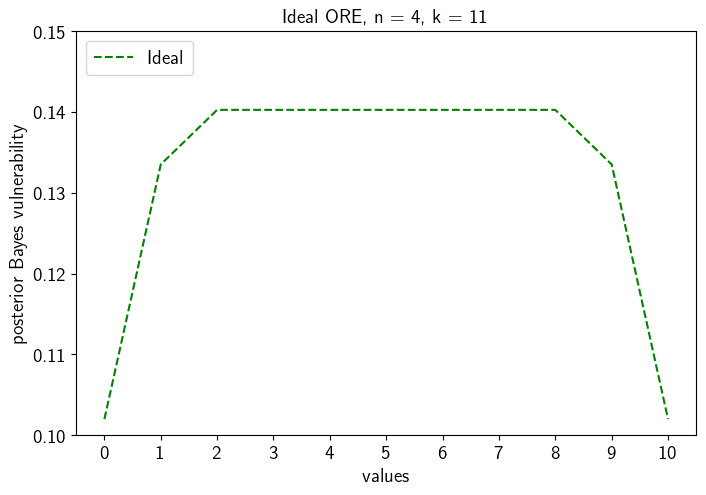

In [38]:
graph_it_val(df)

ppdf(n_range, k, probs) generates a dataframe (table) of n ranging from 1 to n_range of the prior and posterior Bayes vulnerability

In [9]:
def ppdf(n_range, k, probs):
    post_bayes_vs = []
    prior_bayes_vs = []
    n = []
    i = 0
    for x in range(n_range):
        i = i + 1
        n.append(i)
        print("i = ", i)
        post = nonuni_ideal_ore_post_bayes(i, k, probs)
        print("post = ", post)
        post_bayes_vs.append(post)
        prior = pow(probs[0], i) # assumes ordered prior, with biggest first
        prior_bayes_vs.append(prior)
    df = pd.DataFrame(
        {'n':n,
         'prior':prior_bayes_vs,
         'posterior':post_bayes_vs
        }
    )
    return df

In [64]:
n_range = 4
k = 4
probs = [1/2, 1/4, 1/8, 1/8]
df_small = ppdf(n_range, k, probs)

In [65]:
df_small

,n,prior,posterior
0,1,0.5000,0.5000000
1,2,0.2500,0.5000000
2,3,0.1250,0.5000000
3,4,0.0625,0.5234375


In [66]:
probs_middle = [1/8, 1/4, 1/2, 1/8]
df_middle = ppdf(n_range, k, probs_middle)

In [67]:
df_middle

,n,prior,posterior
0,1,0.1250000000,0.500
1,2,0.0156250000,0.500
2,3,0.0019531250,0.500
3,4,0.0002441406,0.625


From n = 1 to 25
and k = 20 plaintext values
such that the first value has probability 1/2 and 19 have equal probability 1/38

In [231]:
n_range = 25
k = 20
probs = [1/2, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38,1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38]
df_half = ppdf(n_range, k, probs)

In [232]:
df_half

,n,prior,posterior
0,1,0.5000000000,0.5000000000
1,2,0.2500000000,0.2763157895
2,3,0.1250000000,0.1478531856
3,4,0.0625000000,0.0792480682
4,5,0.0312500000,0.0427528468
5,6,0.0156250000,0.0232545793
6,7,0.0078125000,0.0127710946
7,8,0.0039062500,0.0070922206
8,9,0.0019531250,0.0039895670
9,10,0.0009765625,0.0022778794


In [233]:
df_half.to_csv(r'data\df_half_n25_k20', index = None, header = True)

In [ ]:
df_half_front = pd.read_csv('data\df_half_n25_k20')

What if the 10th value was the most likely?

In [10]:
n_range = 25
k = 20
probs = [1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/2, 1/38, 1/38, 1/38,1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38]
df_half_middle = ppdf(n_range, k, probs)

i =  1
post =  0.5
i =  2
post =  0.2763157894736842
i =  3
post =  0.16655124653739614
i =  4
post =  0.09630594838897798
i =  5
post =  0.056154850331105496
i =  6
post =  0.03300706701347563
i =  7
post =  0.0196720106126294
i =  8
post =  0.011910473919968344
i =  9
post =  0.007345299630066338
i =  10
post =  0.004624242581448083
i =  11
post =  0.002978576636776399
i =  12
post =  0.0019672954945286615
i =  13
post =  0.0013352323425048248
i =  14


KeyboardInterrupt: 

In [11]:
n = 15
k = 20
probs = [1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/2, 1/38, 1/38, 1/38,1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38]
print(nonuni_ideal_ore_post_bayes(n, k, probs))

0.000672596723635406


In [ ]:
n = 20
k = 20
probs = [1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/2, 1/38, 1/38, 1/38,1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38]
print(nonuni_ideal_ore_post_bayes(n, k, probs))

In [ ]:
n = 25
k = 20
probs = [1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/2, 1/38, 1/38, 1/38,1/38, 1/38, 1/38, 1/38, 1/38, 1/38, 1/38]
print(nonuni_ideal_ore_post_bayes(n, k, probs))

In [ ]:
df_half_middle

In [ ]:
df_half_middle.to_csv(r'data\df_half_middle_n25_k20', index = None, header = True)

In [ ]:
df_half_middle = pd.read_csv('data\df_half_middle_n25_k20')

## Graphs

In [8]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [9]:
def graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bayes vulnerability under non-uniform prior, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

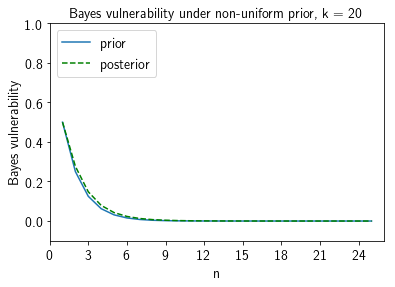

In [234]:
graph_it_bayes(n_range, k, df_half)